In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytorch_lightning==1.9.3
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.4/826.4 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 KB 35.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip "/content/drive/MyDrive/ML 🤖/Datasets/CityScape.zip" -d '/content'


In [ ]:
import os 

base_folder = 'cyclegan_2017'
# change working directory for notebook
os.chdir('/content/drive/MyDrive/ML 🤖/'+base_folder+'/')

# make sure we are in the right directory
path = os.getcwd()
print(path)

/content/drive/MyDrive/ML 🤖/cyclegan_2017


# CycleGAN Implementations

Goal of this project:
*   Practise implementing Generative Model
*   Learn how to engineer neural network architecture myself



In [ ]:
import torch
import pytorch_lightning as pl

import functools

# dataset stuff
# from dataset import Cityscape_Dataset # we are not doing this in colab
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
import time
from tqdm.notebook import tqdm
from torchvision.utils import save_image
import matplotlib.pyplot as plt


from dataset.utils import show_img
from nn.utils import *
from dataset.cityscape_dataset import *
from nn.unet import *
from nn.cnn import *
from nn.cyclegan import *
from nn.cyclegan_pl import *
from nn.disc import *

In [ ]:
root_dir = '/content/drive/MyDrive/ML 🤖/Datasets/CityScape/'
root_dir_h5_data = '/content/drive/MyDrive/ML 🤖/Datasets/CityScape/dataset_train_only.h5'

meta_data = ['vehicle_trainvaltest/vehicle/', 'camera_trainvaltest/camera/' , 'timestamp_sequence/timestamp_sequence/'  ]
save_dir = '/content/drive/MyDrive/COMS 4995 Causal Inference 2/Models_saved/model_condition_on_image/'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
epochs_total = 150
lr = 0.0002
beta1 = 0.5
batch_size = 2

# Dataset

In [ ]:
transform_train = transforms.Compose([transforms.Resize((256,256),  Image.BICUBIC),
                                transforms.Resize((286,286),  Image.BICUBIC),
                                transforms.RandomCrop((256,256)) , 
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
                                ])


train_dataset = Cityscape_Dataset(root_dir= root_dir_h5_data, # '/content/__MACOSX/Dataset/
                  x_dir_name =  '/content/drive/MyDrive/ML 🤖/Datasets/CityScape/camera_trainvaltest/',
                  y_dir_name = '/content/drive/MyDrive/ML 🤖/Datasets/CityScape/leftImg8bit_trainvaltest/leftImg8bit/',
                  meta_data= meta_data,
                  mode = 'train/',
                  input_type = 'gtFine_color.png',
                  output_type = 'leftImg8bit.png',
                  transform = transform_train,
                  mode_data = 'h5_train' #h5_train       
)






train_dataset_loaded = DataLoader( 
                                train_dataset, 
                                batch_size = batch_size, 
                                shuffle=True
                                )


/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [ ]:
# correct
# files:2975;   /content/drive/MyDrive/ML 🤖/Datasets/CityScape/gtFine_trainvaltest/gtFine/train/*/*_gtFine_color.png
# train_dataset.x_dir: /content/drive/MyDrive/ML 🤖/Datasets/CityScape/gtFine_trainvaltest/gtFine/train/

train_dataset.data_file

<HDF5 file "dataset_train_only.h5" (mode r)>

In [ ]:
show_img(train_dataset[10][0])

In [ ]:
show_img(train_dataset[2][1])

# Model

## Play with models

In [ ]:
# unet
net  = UNet(3)
# net(torch.rand(1,3,256,256)).shape

# cnn
h_conv_size = [
            {'in_channels':64, 'out_channels':128, 'kernel_size':3}             

]

net = CNN(h_conv_size)
# net(torch.rand(1,3,256,256)).shape

# disc
net = NLayerDiscriminator(input_nc = 3,ndf = 64  )

#  test pl model
plmodel_test = CycleGAN_PL(0.001, device = device)
# test we can set require grad to false
print(plmodel_test.model.G.inc.maxpool_conv[0].conv[0].weight.requires_grad)

set_requires_grad(plmodel_test.model.G.inc)

print(plmodel_test.model.G.inc.maxpool_conv[0].conv[0].weight.requires_grad)


initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming


torch.Size([1, 3, 256, 256])

# Training

In [ ]:
cycleGAN = CycleGAN_PL(0.001).to(device)
trainer = pl.Trainer(max_epochs = 1,accelerator="gpu", devices=1)
trainer.fit(model=cycleGAN, train_dataloaders=train_dataset_loaded)

initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initialize network with kaiming
initiali

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type              | Params
-------------------------------------------------
0 | model      | CycleGAN          | 114 M 
1 | loss_gan   | BCEWithLogitsLoss | 0     
2 | loss_cycle | L1Loss            | 0     
-------------------------------------------------
114 M     Trainable params
0         Non-trainable params
114 M     Total params
457.437   Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
cycleGAN.model.G.to(device)

out_test = cycleGAN.model.G(torch.unsqueeze(train_dataset[2][0],0))

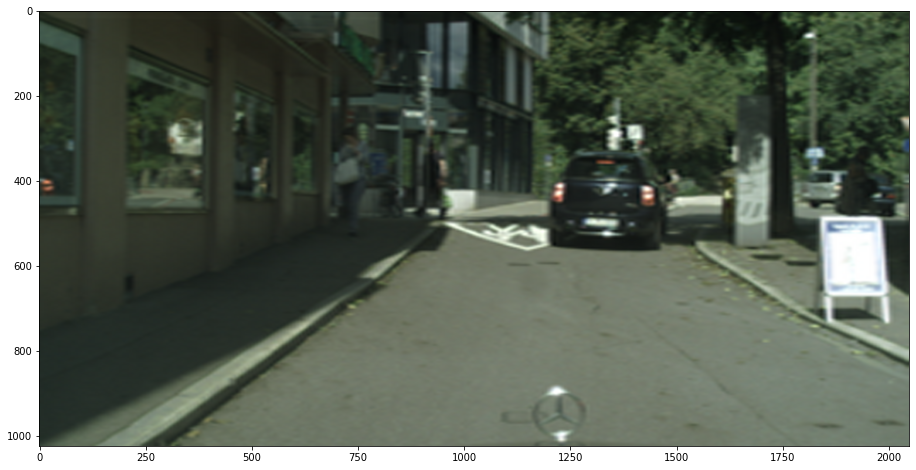

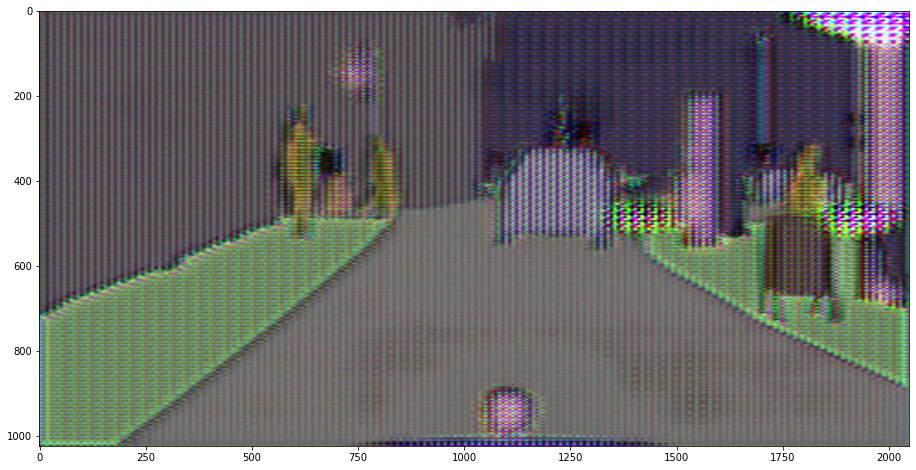

In [ ]:
show_img(train_dataset[2][1].detach().cpu())

show_img(out_test[0].detach().cpu())
#out_test.shape